# Generate the SRD Redshift Distributions
Use this example notebook to generate the LSST DESC SRD-like lens and source distributions.
This notebook calls the get_redshift_distribution() method from the SRDRedshiftDistributions class.
This function returns a normalised redshift distribution for the specified galaxy sample and forecast year.
 The redshift distribution is generated using the Smail-type parametrisation. 
For more information about the parametrisation used, call the help function
or consult the LSST DESC Science Requirement Document (SRD) https://arxiv.org/abs/1809.01669.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import srd_redshift_distributions as srd

## Note on the SRD redshift distributions
The overall redshift distribution of galaxies for LSST is a Smail-type parametrisation of the form:


\begin{equation}
N (z) = \left( \frac{z}{z_0}  \right) ^\beta \exp \left[ - \left( \frac{z}{z_0}  \right) ^\alpha\right] ,
\end{equation}
where $z$ is the redshift, $z_0$ is the pivot redshift, and $\alpha$ and $\beta$ the power law indices. The pivot redshfit and power law indices have different values for lens and source galaxies and for forecast years. These values are stored in the parameters.yaml file and the details can be found in the LSST DESC Science Requirement Document (SRD) https://arxiv.org/abs/1809.01669.

The function get_redshfit_distribution() from the SRDRedshiftDistributions class will output the redshift distribution. The redshift distribution will be normalised by default. This can be omitted by setting the normalisation argument to False. 
There is also a default setting to automatically save the redshfit range and the redshift distribution to a .csv file. If you do not wish to export the result to file, change the argument save_file to False.

## Generate the SRD Redshift Distributions
An example on how to generate the SRD source- and lens-like redshift distributions (Smail-type parametrisation) for an appropriate forecast year.

In [4]:
# Define the redshift interval and forecast years
redshift_range = np.linspace(0.01, 3.5, 300)
forecast_years = ["1", "10"] 

# Create a dictionary to store the redshift distributions
# for each forecast year and galaxy sample
redshift_distribution = {
    "sources": {},
    "lenses": {}
}

for year in forecast_years:
    source_dist = srd.SRDRedshiftDistributions(redshift_range, 
                                               galaxy_sample="source_sample",
                                               forecast_year=year)
    lens_dist = srd.SRDRedshiftDistributions(redshift_range, 
                                             galaxy_sample="lens_sample",
                                             forecast_year=year)

    redshift_distribution["sources"][year] = source_dist.get_redshift_distribution(normalised=True,
                                                                                   save_file=True)
    redshift_distribution["lenses"][year] = lens_dist.get_redshift_distribution(normalised=True,
                                                                                save_file=True)

# Uncomment to check if the dictionary is populated correctly
# print(redshift_distribution["sources"].keys())


## Plot the distributions

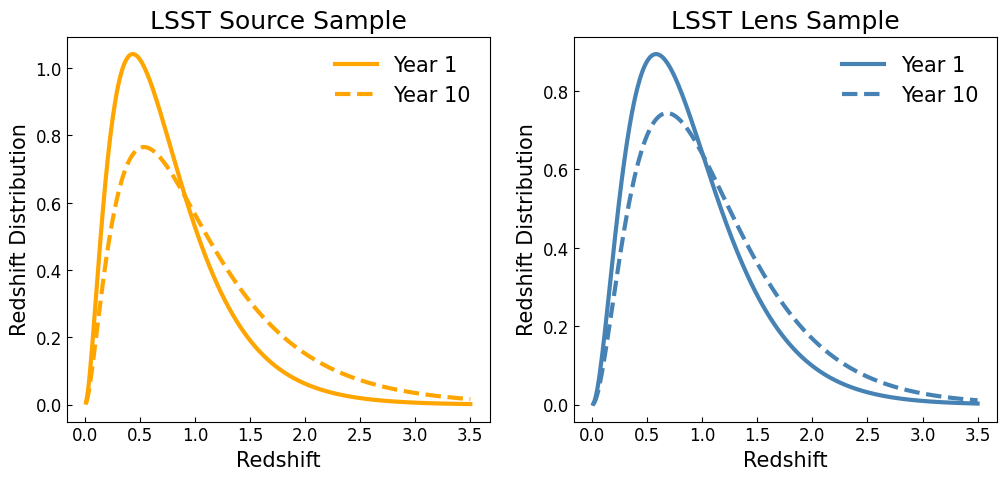

In [3]:
# Set global line width and font sizes
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 15

# Create 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for sources
axs[0].plot(redshift_range, redshift_distribution['sources']['1'], label='Year 1', linestyle='-', color="orange")
axs[0].plot(redshift_range, redshift_distribution['sources']['10'], label='Year 10', linestyle='--', color="orange")
axs[0].set_title('LSST Source Sample')
axs[0].set_xlabel('Redshift')
axs[0].set_ylabel('Redshift Distribution')
axs[0].tick_params(direction='in')
axs[0].legend(frameon=False)

# Plot for lenses
axs[1].plot(redshift_range, redshift_distribution['lenses']['1'], label='Year 1', linestyle='-', color="steelblue")
axs[1].plot(redshift_range, redshift_distribution['lenses']['10'], label='Year 10', linestyle='--', color="steelblue")
axs[1].set_title('LSST Lens Sample')
axs[1].set_xlabel('Redshift')
axs[1].set_ylabel('Redshift Distribution')
axs[1].tick_params(direction='in')
axs[1].legend(frameon=False)
